# TP5 APPRENTISSAGE PROFROND

# SVM Linéaires

## Jeu de données Diabetes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
# Chargement des données
import pandas as pd
data = pd.read_csv('diabetes.csv')

In [2]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
import seaborn as sns

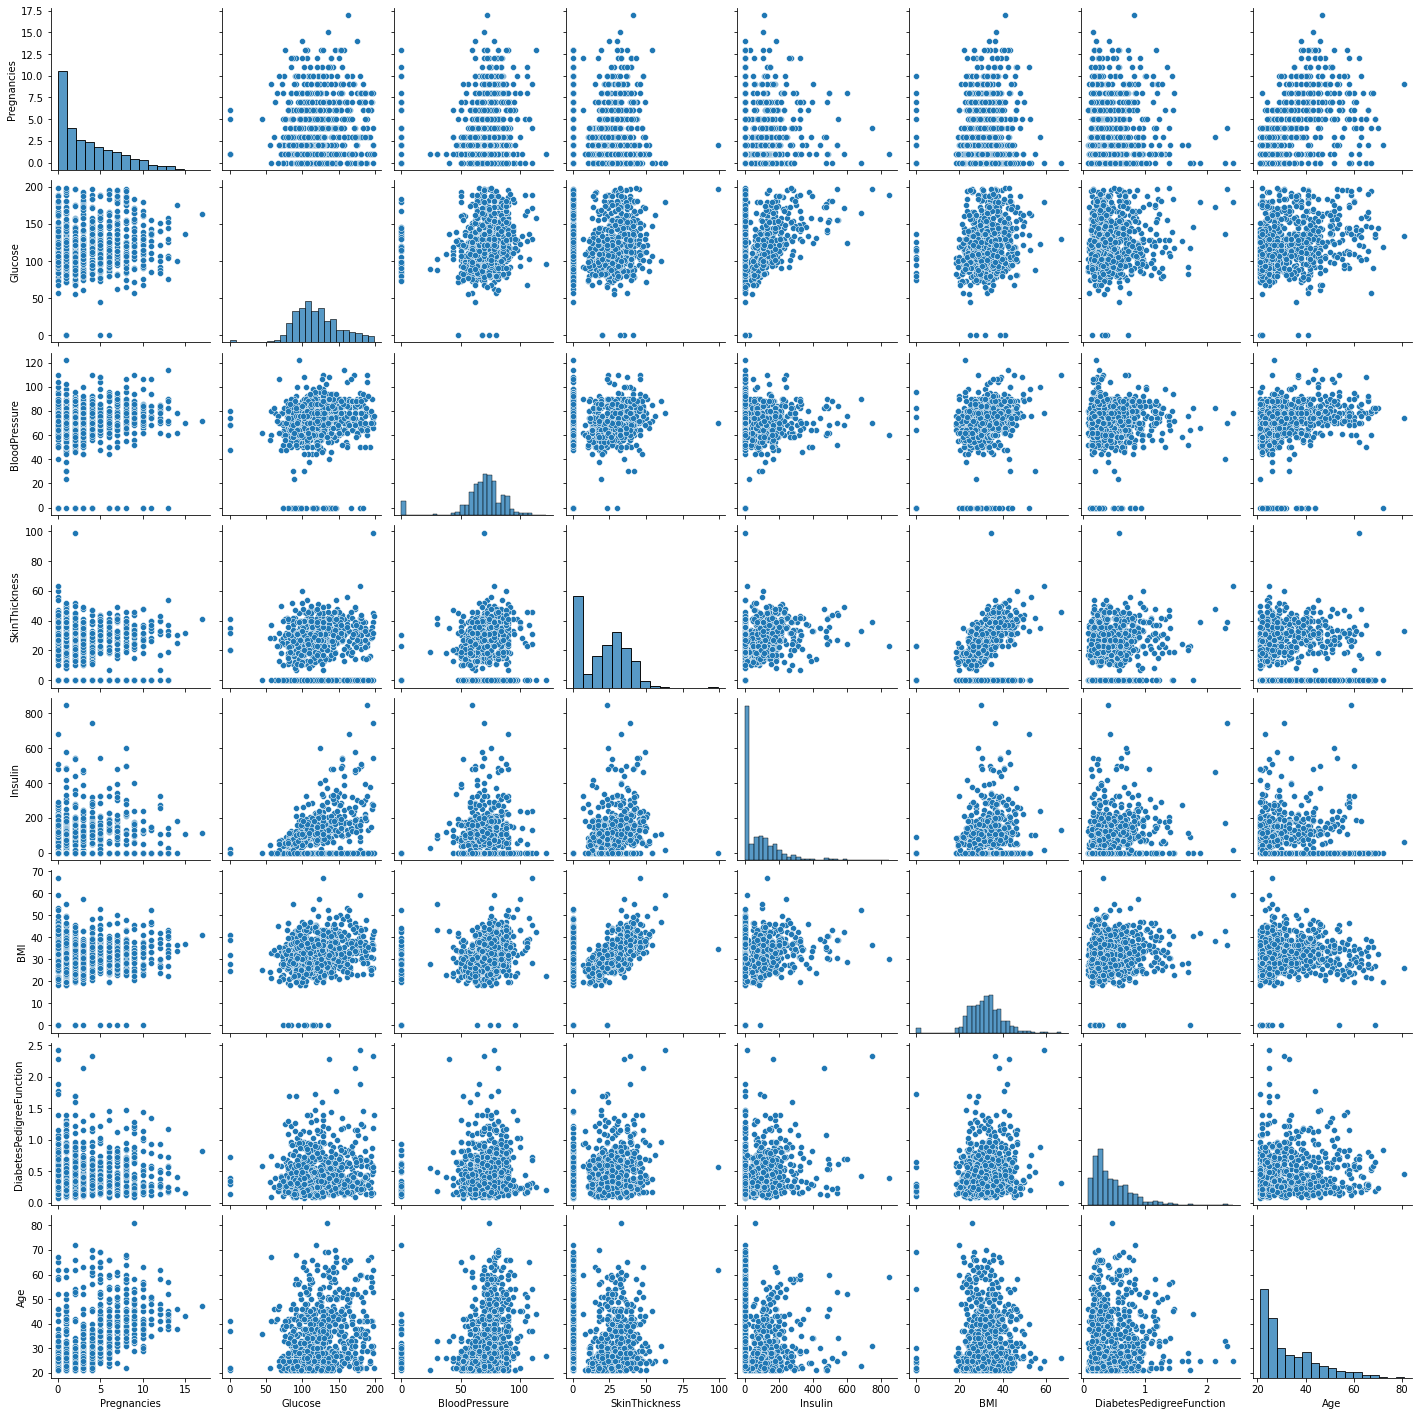

In [4]:
X=pd.DataFrame(data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
sns.pairplot(X)

In [17]:
X=data.iloc[:,[1,7]].values
X

array([[148,  50],
       [ 85,  31],
       [183,  32],
       ...,
       [121,  30],
       [126,  47],
       [ 93,  23]])

In [18]:
y=data.iloc[:,-1].values

In [41]:
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [42]:
C = 100.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100.0)

#### Question
#### Calculez le score d’échantillons bien classifiés sur le jeu de données de test.

In [21]:
lin_svc.score(X_test, y_test)

0.6536458333333334

##### sans standardisation des données

Text(0.5, 1.0, 'LinearSVC')

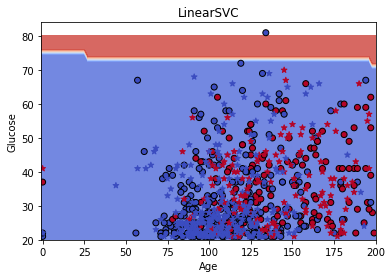

In [22]:
# Créer la surface de décision discretisée
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test,
cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title("LinearSVC")

#### Question :
#### Testez différentes valeurs pour le paramètre C. Comment la frontière de décision évolue en fonction de C ?

valeur de C : 1.0
le score est :  0.4453125


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


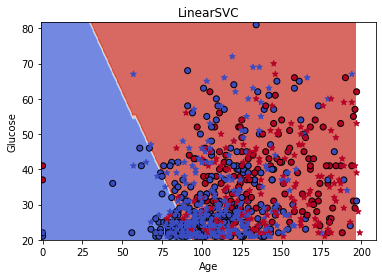

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


valeur de C : 100.0
le score est :  0.3723958333333333


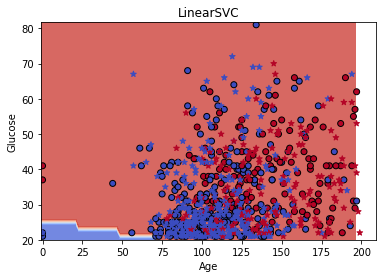

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


valeur de C : 200
le score est :  0.5260416666666666


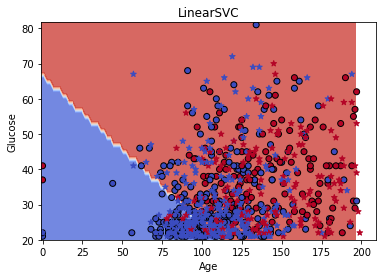

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


valeur de C : 1000.0
le score est :  0.6302083333333334


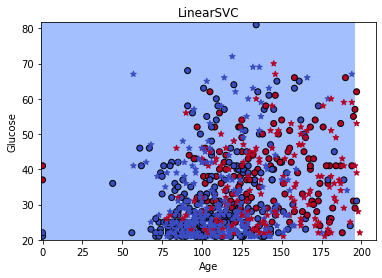

In [45]:
from sklearn.svm import SVC
C = [1.0, 100.0,200, 1000.0]
for k in C :
    lin_svc = svm.LinearSVC(C=k)
    lin_svc.fit(X_train, y_train)
    lin_svc.score(X_train, y_train)    
    plt.figure(k)
    print('valeur de C :', k)
    print('le score est : ',lin_svc.score(X_test, y_test))
    
     # Créer la surface de décision discretisée
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    # Pour afficher la surface de décision on va discrétiser l'espace avec un
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    # Surface de décision
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:,  0],  X_train[:,  1],  label="train",  edgecolors='k',
    c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test,
    cmap=plt.cm.coolwarm)
    plt.xlabel('Age')
    plt.ylabel('Glucose')
    plt.title("LinearSVC")
    plt.show()

##### avec standardisation

In [46]:
from sklearn.preprocessing import StandardScaler

In [ ]:
dataScan=Scaler.fit_transform(data)
X=data.iloc[:,[1,7]].values

y=data.iloc[:,-1].values

valeur de C : 1.0
le score est :  0.3828125


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


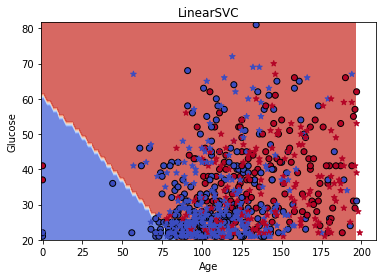

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


valeur de C : 100.0
le score est :  0.6302083333333334


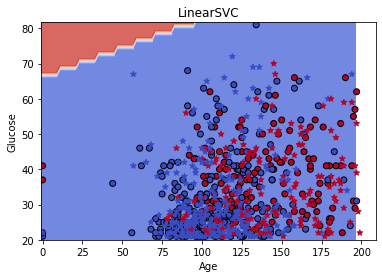

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


valeur de C : 200
le score est :  0.3723958333333333


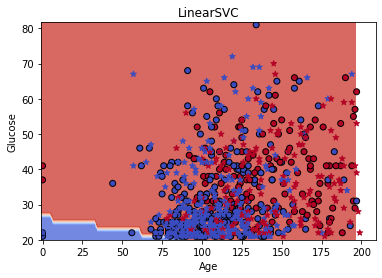

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


valeur de C : 1000.0
le score est :  0.6302083333333334


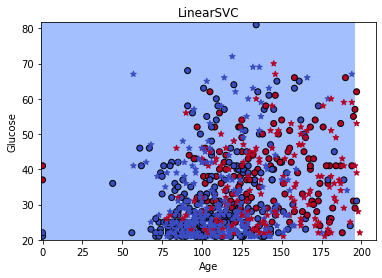

In [47]:
# standardisation 

from sklearn.svm import SVC
C = [1.0, 100.0,200, 1000.0]
for k in C :
    lin_svc = svm.LinearSVC(C=k)
    lin_svc.fit(X_train, y_train)
    lin_svc.score(X_train, y_train)    
    plt.figure(k)
    print('valeur de C :', k)
    print('le score est : ',lin_svc.score(X_test, y_test))
    
     # Créer la surface de décision discretisée
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    # Pour afficher la surface de décision on va discrétiser l'espace avec un
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    # Surface de décision
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:,  0],  X_train[:,  1],  label="train",  edgecolors='k',
    c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test,
    cmap=plt.cm.coolwarm)
    plt.xlabel('Age')
    plt.ylabel('Glucose')
    plt.title("LinearSVC")
    plt.show()

#### Question
#### D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?

On remaque que ce modèle de SVM Linéaire n'est pas adapté au problème lié à notre dataset diabetes. Pour l'améliorer, on doit le faire dans un milieu polynomial.

##### avec standardisation

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


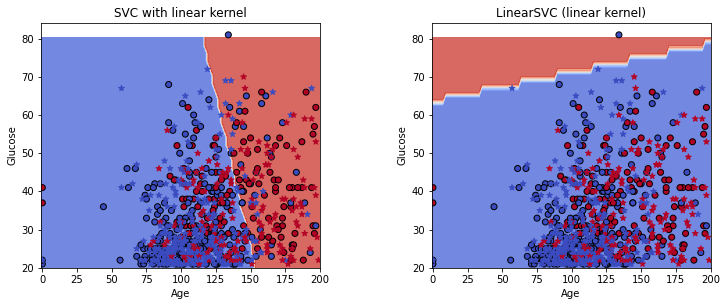

In [44]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']
fig = plt.figure(figsize=(12, 4.5))
for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*',c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Age')
    plt.ylabel('Glucose')
    plt.title(titles[i])
plt.show()

#### Question
#### Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les quatre attributs du jeu de données Diabetes. Le score de classification en test a-t-il augmenté ? Pourquoi ?¶


In [48]:
import pandas as pd
data = pd.read_csv('diabetes.csv')

In [49]:
X=pd.DataFrame(data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [50]:
y=data['Outcome']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [52]:
C = 10.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10.0)

In [53]:
lin_svc.score(X_test, y_test)

0.671875